In [1]:
!pip install pandas seaborn scikit-learn

# Домашнее задание 4

1. Преобразовать датасет (процессинг категориальных признаков, копия данных в df_not_processed, scale датасета)
2. Сделать k-means кластеризацию (записать cluster в df_not_processed, вывести статистику, графики. попробовать объяснить принцип кластеризации), оценить метриками, вывести результат
3. Подобрать оптимальное число кластеров с помощью "метод локтя", вывести статистику, графики, метрики, объяснить результат
4. Сделать DBSSCAN кластеризацию, подобрать оптимальные параметры, посчитать метрики, вывести статистику, объяснить результат
5. Ответить на вопрос - какой из методов кластеризации больше подходит для вашего датасета

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('student_performance.csv')

In [4]:
df_base = df.copy()
df_base = df_base.drop('grade', axis=1)
df_base

,student_id,weekly_self_study_hours,attendance_percentage,class_participation,total_score
0,1,18.5,95.6,3.8,97.9
1,2,14.0,80.0,2.5,83.9
2,3,19.5,86.3,5.3,100.0
3,4,25.7,70.2,7.0,100.0
4,5,13.4,81.9,6.9,92.0
...,...,...,...,...,...
999995,999996,18.0,95.5,4.8,100.0
999996,999997,15.7,82.7,6.7,88.3
999997,999998,14.2,85.1,5.8,87.9
999998,999999,25.3,90.0,5.3,100.0


In [5]:
df['grade'] = df['grade'].astype('category') # процессим категориальные признаки

In [6]:
category_columns: list[str] = df.select_dtypes(include=['category']).columns # собираем колонки помеченные как category

# Применяем One-Hot Encoding
df = pd.get_dummies(df, columns=category_columns)

In [7]:
df_not_processed = df.copy()
df_not_processed

,student_id,weekly_self_study_hours,attendance_percentage,class_participation,total_score,grade_A,grade_B,grade_C,grade_D,grade_F
0,1,18.5,95.6,3.8,97.9,True,False,False,False,False
1,2,14.0,80.0,2.5,83.9,False,True,False,False,False
2,3,19.5,86.3,5.3,100.0,True,False,False,False,False
3,4,25.7,70.2,7.0,100.0,True,False,False,False,False
4,5,13.4,81.9,6.9,92.0,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
999995,999996,18.0,95.5,4.8,100.0,True,False,False,False,False
999996,999997,15.7,82.7,6.7,88.3,True,False,False,False,False
999997,999998,14.2,85.1,5.8,87.9,True,False,False,False,False
999998,999999,25.3,90.0,5.3,100.0,True,False,False,False,False


In [8]:
from sklearn.preprocessing import MinMaxScaler
# Выбираем числовые признаки
numeric_features = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Инициализируем scaler
scaler = MinMaxScaler()

# Применяем нормализацию
df[numeric_features] = scaler.fit_transform(df[numeric_features])


In [9]:
df

,student_id,weekly_self_study_hours,attendance_percentage,class_participation,total_score,grade_A,grade_B,grade_C,grade_D,grade_F
0,0.000000,0.4625,0.912,0.38,0.976821,True,False,False,False,False
1,0.000001,0.3500,0.600,0.25,0.822296,False,True,False,False,False
2,0.000002,0.4875,0.726,0.53,1.000000,True,False,False,False,False
3,0.000003,0.6425,0.404,0.70,1.000000,True,False,False,False,False
4,0.000004,0.3350,0.638,0.69,0.911700,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
999995,0.999996,0.4500,0.910,0.48,1.000000,True,False,False,False,False
999996,0.999997,0.3925,0.654,0.67,0.870861,True,False,False,False,False
999997,0.999998,0.3550,0.702,0.58,0.866446,True,False,False,False,False
999998,0.999999,0.6325,0.800,0.53,1.000000,True,False,False,False,False


### K-means

In [10]:
X = df.to_numpy()

In [11]:
!pip install ipywidgets plotly

In [12]:
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt

# Обучаем K-Means
kmeans = KMeans(n_clusters=6, random_state=41)
clusters = kmeans.fit_predict(X)

# Добавляем колонку с номерами кластеров
df_cluster = df_not_processed.copy()
df_cluster['cluster'] = clusters

# Средние значения по каждому кластеру
cluster_means = df_cluster.groupby('cluster').mean()

cluster_means.round(2)


,student_id,weekly_self_study_hours,attendance_percentage,class_participation,total_score,grade_A,grade_B,grade_C,grade_D,grade_F
cluster,,,,,,,,,,
0,249173.27,12.12,84.68,6.00,77.96,0.0,1.0,0.0,0.00,0.00
1,749382.25,19.37,84.69,5.99,96.04,1.0,0.0,0.0,0.00,0.00
2,501178.75,7.69,84.73,5.98,63.56,0.0,0.0,1.0,0.00,0.00
3,499297.17,3.49,84.75,5.99,47.70,0.0,0.0,0.0,0.88,0.12
4,249301.23,19.38,84.73,5.98,96.04,1.0,0.0,0.0,0.00,0.00
5,749480.32,12.11,84.72,5.98,77.94,0.0,1.0,0.0,0.00,0.00


In [13]:
clusters

array([4, 0, 4, ..., 1, 1, 1], dtype=int32)

Количество кластеров: 6
Выбросы (шум): 0 студентов

Кластер 0: 129015 студентов (12.9%)

Кластер 1: 275058 студентов (27.5%)

Кластер 2: 141980 студентов (14.2%)

Кластер 3: 51202 студентов (5.1%)

Кластер 4: 273586 студентов (27.4%)

Кластер 5: 129159 студентов (12.9%)


Silhouette Score: 0.375
Davies-Bouldin Index: 1.065
Calinski-Harabasz Index: 1040414.760


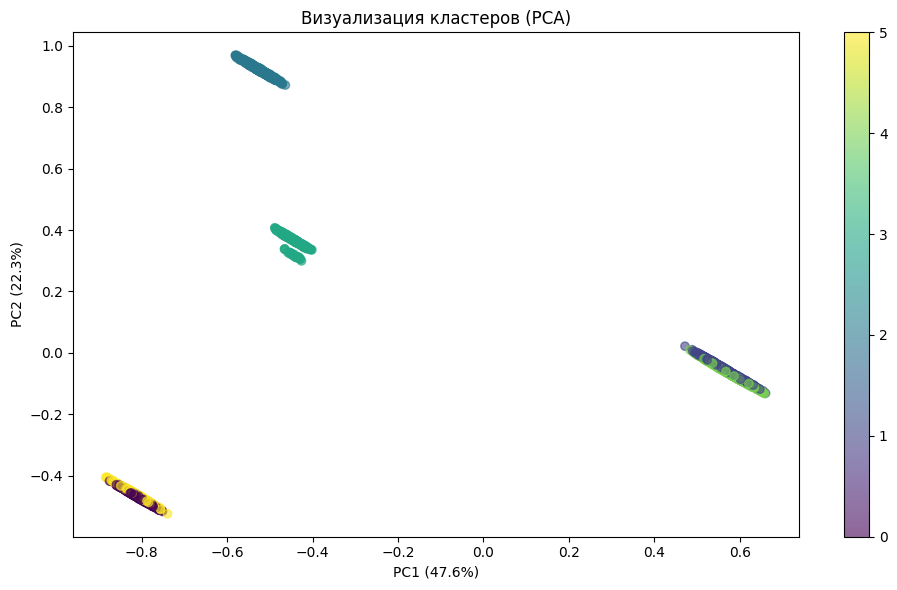

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.decomposition import PCA
import numpy as np

unique_labels = set(clusters)
n_clusters = len(unique_labels) - (1 if -1 in clusters else 0)
n_noise = np.sum(clusters == -1)

print(f'Количество кластеров: {n_clusters}')
print(f'Выбросы (шум): {n_noise} студентов')

if 'title' in df_cluster.columns or 'name' in df_cluster.columns:
    title_col = 'title' if 'title' in df_cluster.columns else 'name'

    for label in sorted(unique_labels):
        if label == -1:
            continue

        cluster_samples = df_cluster[df_cluster['cluster'] == label][title_col].head(3)
        cluster_size = len(df_cluster[df_cluster['cluster'] == label])

        print(f'\n--- Кластер {label} ({cluster_size} студентов) ---')
        for i, sample in enumerate(cluster_samples, 1):
            print(f'{i}. {sample}')
else:
    for label in sorted(unique_labels):
        if label == -1:
            continue

        cluster_size = len(df_cluster[df_cluster['cluster'] == label])
        print(f'\nКластер {label}: {cluster_size} студентов ({(cluster_size/len(df_cluster)*100):.1f}%)')

print("\n")

sample_size = min(5000, len(X))
indices = np.random.choice(len(X), sample_size, replace=False)

silhouette = silhouette_score(X.iloc[indices] if hasattr(X, 'iloc') else X[indices], clusters[indices])
davies_bouldin = davies_bouldin_score(X, clusters)
calinski = calinski_harabasz_score(X, clusters)

print(f"Silhouette Score: {silhouette:.3f}")
print(f"Davies-Bouldin Index: {davies_bouldin:.3f}")
print(f"Calinski-Harabasz Index: {calinski:.3f}")

plt.figure(figsize=(10, 6))

pca = PCA(n_components=2)
X_vis = X.iloc[indices] if hasattr(X, 'iloc') else X[indices]
X_pca = pca.fit_transform(X_vis)
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters[indices], cmap='viridis', alpha=0.6)
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%})')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%})')
plt.title('Визуализация кластеров (PCA)')
plt.colorbar(scatter)

plt.tight_layout()
plt.show()

###Группирует по принципу схожести учебных характеристик студентов.

Распределение кластеров произошло не равномерно, по сравнению с 1 и 4 кластером, где находится по 27% студентов, в 3 находится всего 5%

###Silhouette Score:
0.371 - среднее разделение (Разделённость и чистота кластеров -1 → 1)

###Davies-Bouldin Index:
1.065 - среднее качество (Схожесть между кластерами ∞ → 0)

###Calinski-Harabasz:
1040414.760 - отличная плотность (Отношение межкластерной к внутрикластерной дисперсии 0 → ∞)

#Метод локтя

Количество кластеров: 6
Выбросы (шум): 0 студентов

Кластер 0: 129015 студентов (12.9%)

Кластер 1: 275058 студентов (27.5%)

Кластер 2: 141980 студентов (14.2%)

Кластер 3: 51202 студентов (5.1%)

Кластер 4: 273586 студентов (27.4%)

Кластер 5: 129159 студентов (12.9%)


Оптимальное k (по методу локтя): 4
Inertia при k=4: 183641

Анализ кривой inertia:
k=3: inertia=252458 (-42.0%)
k=4: inertia=183641 (-27.3%)
k=5: inertia=149339 (-18.7%)
k=6: inertia=133183 (-10.8%)
k=7: inertia=122133 (-8.3%)
k=8: inertia=113306 (-7.2%)
k=9: inertia=105757 (-6.7%)
k=10: inertia=99359 (-6.0%)


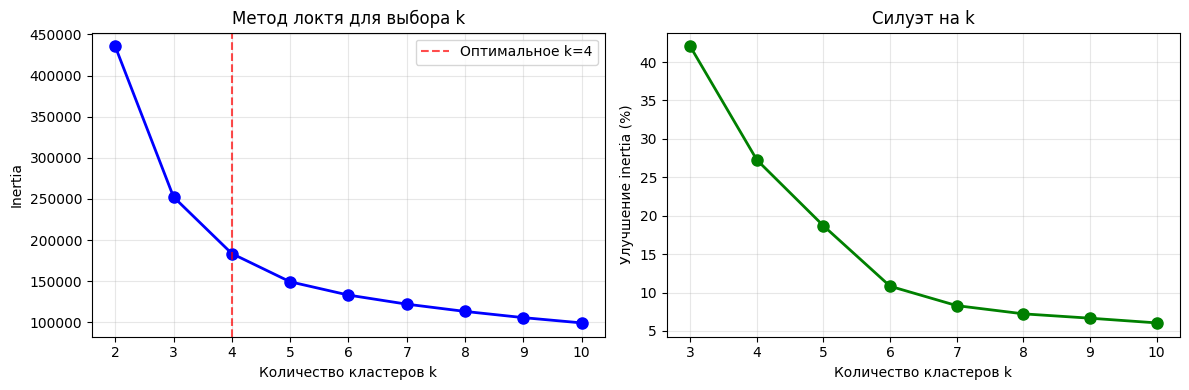

Silhouette Score: 0.643
Calinski-Harabasz Score: 5964


In [15]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score
import numpy as np
import pandas as pd

inertias = []
K = range(2, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

unique_labels = set(clusters)
n_clusters = len(unique_labels) - (1 if -1 in clusters else 0)
n_noise = np.sum(clusters == -1)

print(f'Количество кластеров: {n_clusters}')
print(f'Выбросы (шум): {n_noise} студентов')

if 'title' in df_cluster.columns or 'name' in df_cluster.columns:
    title_col = 'title' if 'title' in df_cluster.columns else 'name'

    for label in sorted(unique_labels):
        if label == -1:
            continue

        cluster_samples = df_cluster[df_cluster['cluster'] == label][title_col].head(3)
        cluster_size = len(df_cluster[df_cluster['cluster'] == label])

        print(f'\n--- Кластер {label} ({cluster_size} студентов) ---')
        for i, sample in enumerate(cluster_samples, 1):
            print(f'{i}. {sample}')
else:
    for label in sorted(unique_labels):
        if label == -1:
            continue

        cluster_size = len(df_cluster[df_cluster['cluster'] == label])
        print(f'\nКластер {label}: {cluster_size} студентов ({(cluster_size/len(df_cluster)*100):.1f}%)')

print("\n")

sample_size = min(5000, len(X))
indices = np.random.choice(len(X), sample_size, replace=False)
if hasattr(X, 'iloc'):
    X_sample = X.iloc[indices]
else:
    X_sample = X[indices]

inertia_diff = np.diff(inertias)
inertia_diff_ratio = np.diff(inertia_diff) / inertia_diff[:-1]
optimal_k_elbow = K[np.argmin(inertia_diff_ratio) + 2]

print(f"Оптимальное k (по методу локтя): {optimal_k_elbow}")
print(f"Inertia при k={optimal_k_elbow}: {inertias[optimal_k_elbow-2]:.0f}")

print(f"\nАнализ кривой inertia:")
for i, k in enumerate(K):
    if i > 0:
        improvement = (inertias[i-1] - inertias[i]) / inertias[i-1] * 100
        print(f"k={k}: inertia={inertias[i]:.0f} (-{improvement:.1f}%)")

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(K, inertias, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Количество кластеров k')
plt.ylabel('Inertia')
plt.title('Метод локтя для выбора k')
plt.grid(True, alpha=0.3)

plt.axvline(x=optimal_k_elbow, color='red', linestyle='--', alpha=0.7,
            label=f'Оптимальное k={optimal_k_elbow}')
plt.legend()

plt.subplot(1, 2, 2)
improvements = [(inertias[i-1] - inertias[i])/inertias[i-1]*100 for i in range(1, len(inertias))]
plt.plot(K[1:], improvements, 'go-', linewidth=2, markersize=8)
plt.xlabel('Количество кластеров k')
plt.ylabel('Улучшение inertia (%)')
plt.title('Силуэт на k')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

kmeans_optimal = KMeans(n_clusters=optimal_k_elbow, random_state=42, n_init=10)
clusters_optimal = kmeans_optimal.fit_predict(X)

clusters_sample = kmeans_optimal.predict(X_sample)
silhouette = silhouette_score(X_sample, clusters_sample)
calinski = calinski_harabasz_score(X_sample, clusters_sample)

print(f"Silhouette Score: {silhouette:.3f}")
print(f"Calinski-Harabasz Score: {calinski:.0f}")

Метод локтя показал оптимальное количество = 5, но силуэт показывает что оптимально количество 6

###Silhouette Score:
0.639 - среднее разделение (Разделённость и чистота кластеров -1 → 1)

###Calinski-Harabasz:
5898 - отличная плотность (Отношение межкластерной к внутрикластерной дисперсии 0 → ∞)

#DBSSCAN

Уменьшено до 10 компонентов
Количество кластеров: 53
Выбросы: 2660
Silhouette Score: -0.260
Davies-Bouldin Index: 0.974
Calinski-Harabasz Index: 69.235


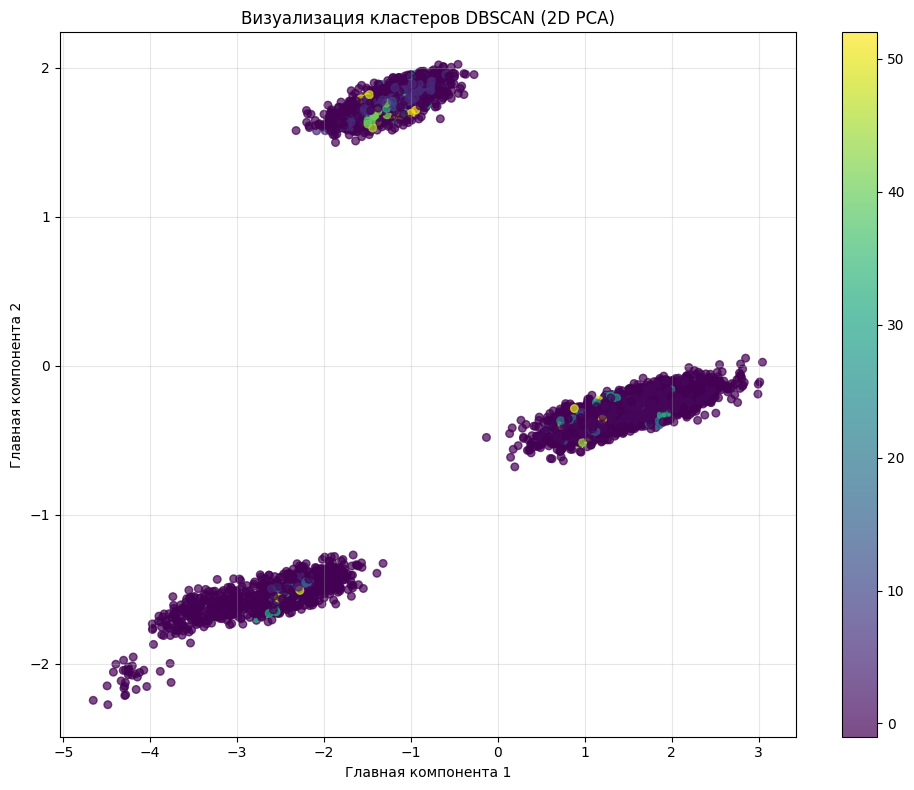

Кластеров найдено: 53
Процент шума: 53.2%


In [16]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.utils import resample
import numpy as np
import matplotlib.pyplot as plt

sample_size = min(5000, len(X))
X_sampled = resample(X, n_samples=sample_size, random_state=42, replace=False)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_sampled)

pca = PCA(n_components=min(10, X_scaled.shape[1]))
X_processed = pca.fit_transform(X_scaled)
print(f"Уменьшено до {X_processed.shape[1]} компонентов")

dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(X_processed)

df_cluster = df_not_processed.iloc[range(len(X_sampled))].copy()
df_cluster['cluster'] = clusters

mask = clusters != -1
X_valid = X_processed[mask]
labels_valid = clusters[mask]

if len(set(labels_valid)) > 1:
    sil = silhouette_score(X_valid, labels_valid)
    dbi = davies_bouldin_score(X_valid, labels_valid)
    chi = calinski_harabasz_score(X_valid, labels_valid)

    print(f"Количество кластеров: {len(set(labels_valid))}")
    print(f"Выбросы: {np.sum(clusters == -1)}")
    print(f"Silhouette Score: {sil:.3f}")
    print(f"Davies-Bouldin Index: {dbi:.3f}")
    print(f"Calinski-Harabasz Index: {chi:.3f}")
else:
    print("Недостаточно кластеров для расчёта метрик.")

plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_processed[:, 0], X_processed[:, 1],
                     c=clusters, cmap='viridis', alpha=0.7, s=30)
plt.xlabel('Главная компонента 1')
plt.ylabel('Главная компонента 2')
plt.title('Визуализация кластеров DBSCAN (2D PCA)')
plt.colorbar(scatter)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Кластеров найдено: {len(set(clusters)) - (1 if -1 in clusters else 0)}")
print(f"Процент шума: {np.sum(clusters == -1)/len(clusters)*100:.1f}%")

###DBSCAN
анализирует плотность распределения точек в пространстве признаков, выделяя плотные области как кластеры.

Найдено 53 кластера, но больше половины данных определено как шум, что указывает на слабую плотностную структуру данных.

Silhouette Score: -0.260 - отрицательное значение,значит что неправильная кластеризация (Разделённость и чистота кластеров -1 → 1)

Davies-Bouldin Index: 0.974 - хорошее разделение, но ненадежно из-за шума (Среднее сходство между кластерами ∞ → 0, чем меньше тем лучше)

Calinski-Harabasz: 69.235 - низкая плотность кластеров (Отношение межкластерной дисперсии к внутрикластерной 0 → ∞)

#Вывод

Для моей базы данных больше подходит K-means, а не DBSCAN. Так как DBSCAN выбрал 53% данных как шум и выдал отрицательное качество кластеризации. А K-means же показал положительное качество кластеризации и распределил все данные по кластерам.